<a href="https://colab.research.google.com/github/753x/AIFFEL_ONLINE_QUEST/blob/master/DeepLearning/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 로드 및 전처리**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
num_classes = np.max(train_labels) + 1
y_train = to_categorical(train_labels, num_classes)
y_val = to_categorical(val_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

# **모델 구성 및 컴파일**

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Dense(units=128, input_shape=(10000,)))  # input_dim은 데이터의 특성 개수에 맞게 설정
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=46, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

# **모델 학습**

In [6]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ModelCheckpoint 콜백 설정
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# 콜백 함수 리스트
callbacks_list = [checkpoint, early_stopping]

# 모델 학습
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/50
41/43 [===========================>..] - ETA: 0s - loss: 3.6422 - accuracy: 0.1164
Epoch 1: val_accuracy improved from -inf to 0.48887, saving model to best_model.h5
43/43 [==============================] - 8s 46ms/step - loss: 3.6320 - accuracy: 0.1193 - val_loss: 3.4913 - val_accuracy: 0.4889
Epoch 2/50
43/43 [==============================] - ETA: 0s - loss: 2.7403 - accuracy: 0.4226
Epoch 2: val_accuracy improved from 0.48887 to 0.53709, saving model to best_model.h5
43/43 [==============================] - 2s 39ms/step - loss: 2.7403 - accuracy: 0.4226 - val_loss: 2.9311 - val_accuracy: 0.5371
Epoch 3/50
43/43 [==============================] - ETA: 0s - loss: 2.2135 - accuracy: 0.5510
Epoch 3: val_accuracy improved from 0.53709 to 0.58754, saving model to best_model.h5
43/43 [==============================] - 2s 38ms/step - loss: 2.2135 - accuracy: 0.5510 - val_loss: 2.3755 - val_accuracy: 0.5875
Epoch 4/50
42/43 [============================>.] - ETA: 0s - loss: 1.887

<ipython-input-7-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


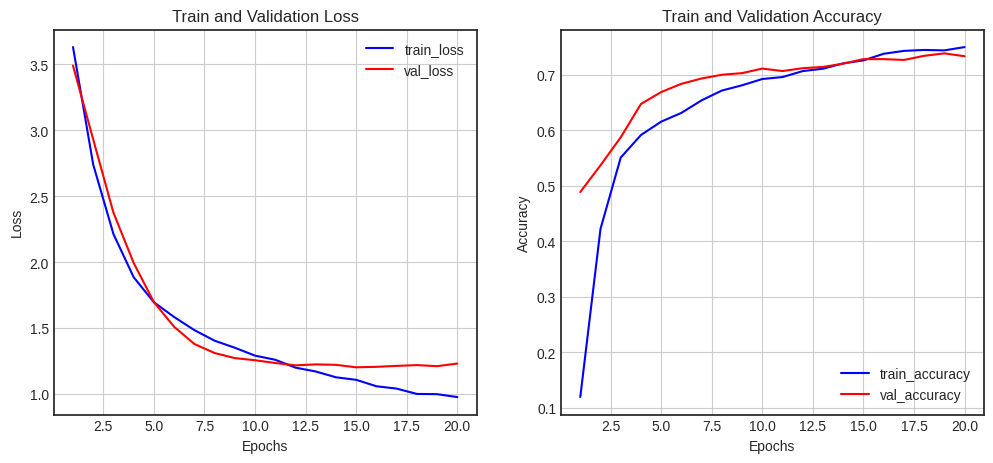

In [7]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# **모델 평가 및 예측**

In [10]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("테스트 손실:", test_loss)
print("테스트 정확도:", test_accuracy)

71/71 [==============================] - 0s 5ms/step - loss: 1.3216 - accuracy: 0.7244
테스트 손실: 1.3215669393539429
테스트 정확도: 0.7243989109992981
